In [14]:
%run backend
d1, s1 = get_sample()

In [5]:
listen(d1, s1)

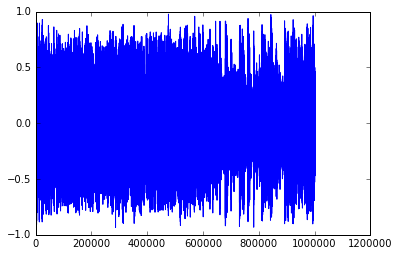

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(d1)

(array([[  3.96483502e-03,   2.09134273e-03,   1.76952530e-05, ...,
           1.70985902e-01,   5.24789133e-01,   1.06637473e-01],
        [  5.23699059e-02,   5.69842984e-03,   1.23505394e-02, ...,
           3.38416829e-01,   6.23649494e-01,   1.49266827e-01],
        [  1.76012413e-01,   6.92284666e-03,   1.54194362e-02, ...,
           6.97956205e-01,   1.97737095e-01,   1.86838970e-01],
        ..., 
        [  6.30169895e-08,   1.40588683e-08,   5.43271692e-08, ...,
           9.68039517e-09,   6.37989318e-11,   5.66102754e-08],
        [  8.55212751e-08,   1.39173338e-09,   2.06100262e-08, ...,
           5.25391336e-09,   5.64641909e-09,   5.97011294e-08],
        [  1.54121682e-08,   1.64685300e-09,   3.57435663e-09, ...,
           2.08012640e-09,   5.15903133e-09,   1.51196705e-08]]),
 array([ 0.       ,  0.0078125,  0.015625 ,  0.0234375,  0.03125  ,
         0.0390625,  0.046875 ,  0.0546875,  0.0625   ,  0.0703125,
         0.078125 ,  0.0859375,  0.09375  ,  0.1015625, 

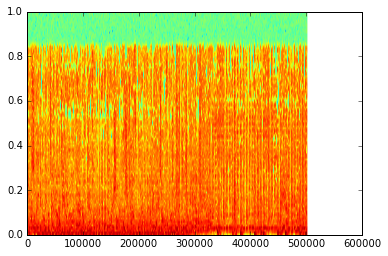

In [7]:
plt.specgram(d1)

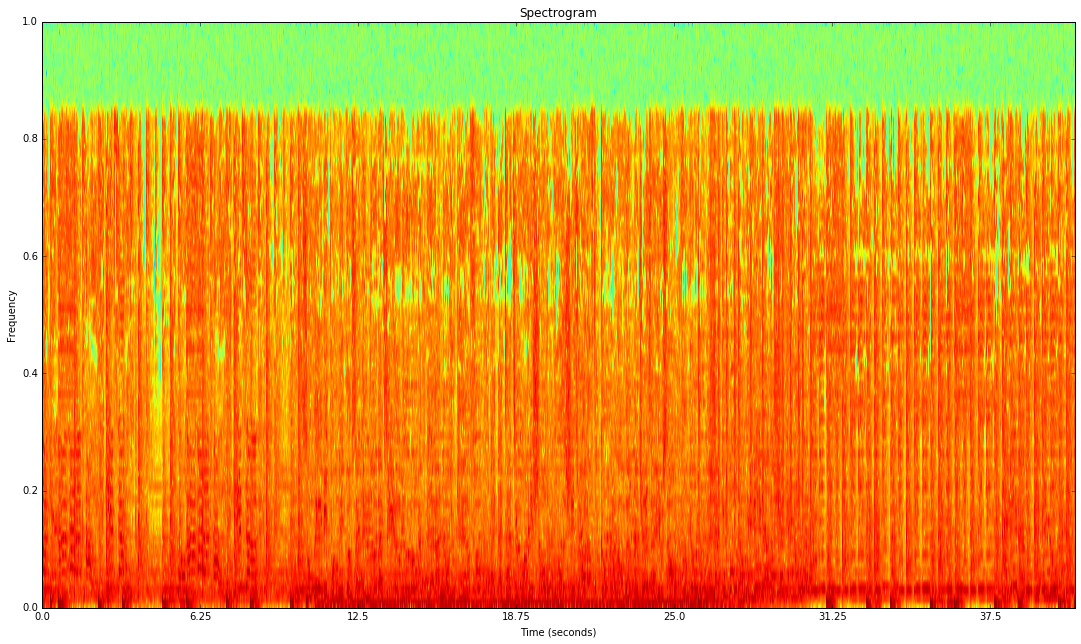

In [16]:
from matplotlib import mlab
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def my_specgram(x, start = None, end = None, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
             window=mlab.window_hanning, noverlap=128,
             cmap=None, xextent=None, pad_to=None, sides='default',
             scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs):
    #####################################
    # modified  axes.specgram() to limit
    # the frequencies plotted
    #####################################

    # this will fail if there isn't a current axis in the global scope
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.gca()
    Pxx, freqs, bins = mlab.specgram(x, NFFT, Fs, detrend,
         window, noverlap, pad_to, sides, scale_by_freq)

    # modified here
    #####################################
    if minfreq is not None and maxfreq is not None:
        Pxx = Pxx[(freqs >= minfreq) & (freqs <= maxfreq)]
        freqs = freqs[(freqs >= minfreq) & (freqs <= maxfreq)]
    #####################################

    Z = 10. * np.log10(Pxx)
    Z = np.flipud(Z)

    if xextent is None: xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    freqs += Fc
    extent = xmin, xmax, freqs[0], freqs[-1]
    im = ax.imshow(Z, cmap, extent=extent, **kwargs)
    ax.axis('auto')
    
    ticks= list(plt.xticks()[0])
    plt.xticks(ticks, [t/16000.0 for t in ticks], rotation="horizontal")
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency")
    plt.title("Spectrogram")
    
    plt.xlim([0, xmax])

    return

N = len(d1)
my_specgram(d1)

In [15]:
listen(d1, s1)

In [1]:
print "derp"

derp
